# Running DCA
This notebook is for running DCA on the Churchland dataset.

In [5]:
import dca
from dca import DynamicalComponentsAnalysis as DCA

In [21]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from math import sqrt
from scipy import optimize
from mpl_toolkits.mplot3d import Axes3D

In [34]:
from scipy.io import loadmat

# loading in one condition
data = loadmat("../data/exampleData.mat")
x = data['Data'][0][0][0]
X = np.array(x)

In [19]:
X = X[:-1, :]
model = DCA(d=3, T=2)
model.fit(X)

Y = model.transform(X)

In [9]:
X = np.random.randn(1000, 9)

model = DCA(d=3, T=10)
model.fit(X)

Y = model.transform(X)

In [20]:
Y

array([[-18.97514986, -97.89025281,  70.11346625],
       [-16.60246228, -96.75185319,  71.67733938],
       [-13.55571304, -95.44365984,  73.55986485],
       [ -9.58409041, -93.98079997,  75.62181971],
       [ -4.39508041, -92.40640014,  77.64519578],
       [  2.30520163, -90.77971766,  79.34734362],
       [ 10.74451383, -89.14250616,  80.39861198],
       [ 20.99342108, -87.47543586,  80.44864147],
       [ 32.86196744, -85.66249463,  79.17250479],
       [ 45.8081412 , -83.47817888,  76.33783639],
       [ 58.9004498 , -80.60503573,  71.88779987],
       [ 70.88171552, -76.68019516,  65.99682394],
       [ 80.36325668, -71.366445  ,  59.06574313],
       [ 86.12498233, -64.43456741,  51.63381317],
       [ 87.43159728, -55.8326967 ,  44.22578914],
       [ 84.24043395, -45.71721349,  37.19737847],
       [ 77.20668958, -34.43485108,  30.65041715],
       [ 67.48071551, -22.46869062,  24.45471805],
       [ 56.38714783, -10.37315746,  18.35631726],
       [ 45.11743226,   1.28470

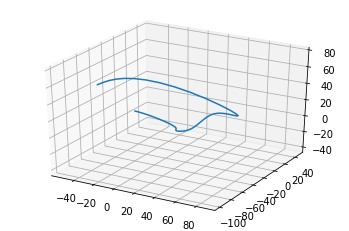

In [30]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
Axes3D.plot(ax, xs=Y[:, 0], ys=Y[:, 1], zs = Y[:, 2], zdir = 'z')


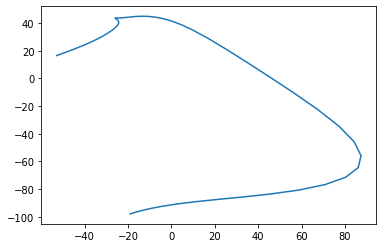

In [31]:
plt.plot(Y[:, 0], Y[:, 1])

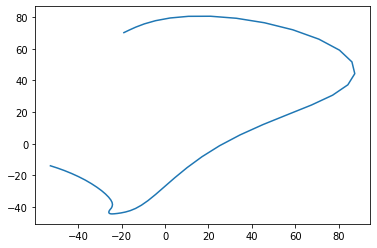

In [32]:
plt.plot(Y[:, 0], Y[:, 2])

In [33]:
model.score()

tensor(8.1903, dtype=torch.float64)

Let's try stacking all the conditions...

In [44]:
big_data = data['Data'].flatten()
big_data.shape

(108,)

In [46]:
conditions = big_data[0][0]
for condition in big_data[1:]:
    conditions = np.vstack((conditions, condition[0]))

In [47]:
conditions.shape

(6588, 218)

In [49]:
model = DCA(d=3, T=60)
model.fit(conditions)

Y = model.transform(conditions)

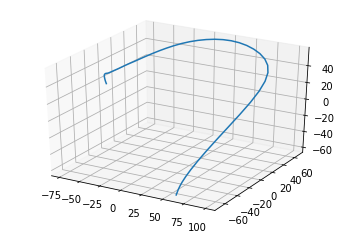

In [55]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
Axes3D.plot(ax, xs=Y[61:120, 0], ys=Y[61:120, 1], zs = Y[61:120, 2], zdir = 'z')
